# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
import requests

pokemon = input('Enter a pokemon: ')

url = f'https://pokeapi.co/api/v2/pokemon/{pokemon}/'

response = requests.get(url)

if response.status_code == 200:
    print('Success')
    data = response.json()
else:
    print(f'ERROR, STATUS CODE {response.status_code}')
    


Enter a pokemon: pikachu
Success


In [20]:
print(data['name'])

pikachu


### Display a Pokemon's name, weight, abilities, and types

In [21]:
# get the name
name = data['name']
print(name)

pikachu


In [22]:
# get types
type_list = data['types']

types = list(map(lambda x: x['type']['name'], type_list))

In [23]:
types

['electric']

In [24]:
# get weight
weight = data['weight']
print(weight)

60


In [25]:
# get abilities
abilities = data['abilities']

abilities = list(map(lambda x: x['ability']['name'], abilities))

In [26]:
print(abilities)

['static', 'lightning-rod']


In [27]:
ability_name = [item['ability']['name'] for item in data ['abilities']]
print(ability_name)

['static', 'lightning-rod']


In [28]:
# Create a structure for a single pokemon
class Pokemon:
    def __init__(self, name, types, weight, abilities):
        self.name = name
        self.types = types
        self.weight = weight
        self.abilities = abilities

In [29]:
my_pokemon = Pokemon(name, types, weight, abilities)

In [30]:
my_pokemon.name

'pikachu'

#### Create a function to Pull in your own Pokemon's data 

In [31]:
# class Pokemon:
#     def __init__(self, name, types, weight, abilities):
#         self.name = name
#         self.types = types
#         self.weight = weight
#         self.abilities = abilities
        
# def poke_api_call(pokemon):
#     # Use the pokemon parameter to make a request to the pokeapi
#     # if the status code is 200:
#         # Get the pokemon's data with the json method
#         # Pull out the name, weight, types, abilities
#         # Create an instance of the Pokemon class
#         # Return the instance of the class
#     # if the status code is not 200, print an error message
#     url = f'https://pokeapi.co/api/v2/pokemon/{pokemon}/'
#     response = requests.get(url)
    
#     if response.status_code == 200:
#         print('Success')
#         data = response.json()
#     else:
#         print(f'ERROR, STATUS CODE {response.status_code}')
    
#     poke_dict = [name, types, weight, abilities]
#     return poke_dict
        
#     return my_pokemon

    
        

In [32]:
def poke_api_call(pokemon):
    # Use the pokemon parameter to make a request to the pokeapi
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/')
    # if the status code is 200:
    if response.status_code == 200:
        # Get the pokemon's data with the json method
        data = response.json()
        # Pull out the name, weight, types, abilities
        name = data['name']
        types = data['types']
        types = list(map(lambda x: x['type']['name'], types))
        weight = data['weight']
        abilities = data['abilities']
        abilities = list(map(lambda x: x['ability']['name'], abilities))
        # Create an instance of the Pokemon class
        pokemon = Pokemon(name, types, weight, abilities)
        # Return the instance of the class
        return pokemon
    # if the status code is not 200, print an error message
    else:
        print(f'ERROR, STATUS CODE {response.status_code}')
    

In [33]:
pokemon1 = poke_api_call('pikachu')
pokemon1.types

['electric']

In [34]:
pokemon2 = poke_api_call('squirtle')
pokemon2.types

['water']

Choose your pokemon

In [35]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


In [36]:
random_team = list(map(poke_api_call, random_team))

In [37]:
random_team

In [38]:
your_team = list(map(poke_api_call, your_team))

your_team = list(map(poke_api_call, your_team))

In [39]:
for team_member in random_team:
    print(team_member.name)

skiddo
mesprit
rotom
flygon
mienshao
fennekin


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [40]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}
for team_member in your_team:
    my_six_pokemon[team_member.name] = team_member
    
print(my_six_pokemon)

{'electabuzz': <__main__.Pokemon object at 0x7fa9205953d0>, 'haunter': <__main__.Pokemon object at 0x7fa951b6e520>, 'tyranitar': <__main__.Pokemon object at 0x7fa951f878b0>, 'blaziken': <__main__.Pokemon object at 0x7fa920595ee0>, 'marowak': <__main__.Pokemon object at 0x7fa900163df0>, 'dragonair': <__main__.Pokemon object at 0x7fa900163c10>}


In [41]:
my_six_pokemon['haunter'].abilities

['levitate']

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [42]:
# create a structure for a single pokemon

class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            
            type_list = data['types']
            self.types = list(map(lambda x: x['type']['name'], type_list))
            
            self.weight = data['weight']
            
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            
            self.sprite = data['sprites']['front_default']
        # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
    

In [43]:
pikachu = Pokemon('pikachu')

In [44]:
pikachu.sprite

'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/25.png'

### Let's Catch some Pokemon

In [45]:
class Pokedex:
    def __init__(self):
        self.pokemon = {}
        
    def add_pokemon(self, name):
        new_pokemon = Pokemon(name)
        self.pokemon[new_pokemon.name] = new_pokemon


In [46]:
my_pokedex = Pokedex()

In [47]:
my_pokedex.add_pokemon('pikachu')

In [48]:
my_pokedex.add_pokemon(10)

In [49]:
my_pokedex.pokemon

{'pikachu': <__main__.Pokemon at 0x7fa90016c190>,
 'caterpie': <__main__.Pokemon at 0x7fa90016c730>}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [11]:
# Display an image in Jupyter notebook
from IPython.display import Image

#display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [12]:
# recreate your pokemon class here
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            
            type_list = data['types']
            self.types = list(map(lambda x: x['type']['name'], type_list))
            
            self.weight = data['weight']
            
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            
            self.sprite = data['sprites']['front_default']
        # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def print_picture(self):
        display(Image(self.sprite, width = 300))
        

In [13]:
pikachu = Pokemon('pikachu')

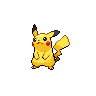

In [14]:
# Calling our new method
pikachu.print_picture()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [48]:
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call(self.name)
        
    def poke_api_call(self, name):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{name}/')
        
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            
            type_list = data['types']
            self.types = list(map(lambda x: x['type']['name'], type_list))
            
            self.weight = data['weight']
            
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            
            self.sprite = data['sprites']['front_default']
        # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def print_picture(self):
        display(Image(self.sprite, width = 300))
            
    def evolve(self):
        new_poke = input('What Pokemon would you like to evolve to?: ')
        print(f"Your evolved Pokemon is {new_poke.title()}!")
        self.poke_api_call(new_poke)
        self.print_picture()
        print(f'{self.name.title()} is a(n) {self.types} type Pokemon.')
        print(f'they weigh {self.weight} lbs & their main abilities are: {self.abilities}')
        

In [49]:
    def true_evolve(self):
        pass

Now let's evolve a few

In [50]:
pikachu = Pokemon('pikachu')

What Pokemon would you like to evolve to?: raichu
Your evolved Pokemon is Raichu!


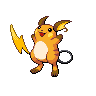

Raichu is a(n) ['electric'] type Pokemon.
they weigh 300 lbs & their main abilities are: ['static', 'lightning-rod']


In [51]:
pikachu.evolve()


#  Final Exercise (OPTIONAL!) : <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
